In [2]:
#importing libraries for exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,chi2_contingency,kstest,levene,f_oneway,shapiro,kruskal

In [3]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [9]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [228]:
# importing dataset
df = pd.read_csv('scaler_apollo_hospitals.csv')

In [8]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


# Problem Statement - 
1. Which variables are significant in predicting the reason for hospitalization for different regions ?
2. How well some variables like viral load, smoking, severity level describe the hospitalization charges ?

In [229]:
# Dropping unnecessary column 'Unnamed: 0'
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [12]:
# Shape of dataset
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 1338
Number of columns : 7


In [13]:
# Columns in the data-set
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

# Column Profiling
* Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government)
* Sex: This is the policy holder's gender, either male or female
* Viral Load: Viral load refers to the amount of virus in an infected person's blood
* Severity Level: This is an integer indicating how severe the patient is
* Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
* Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
* Hospitalization charges: Individual medical costs billed to health insurance

In [14]:
#Brief info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [16]:
# Unique values present in the dataset
for i in df.columns:
    print(i,':',df[i].nunique())

age : 47
sex : 2
smoker : 2
region : 4
viral load : 462
severity level : 6
hospitalization charges : 1320


In [18]:
#checking null values in every column of our data
df.isna().sum()/len(df)*100

age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

# Inference : There are no null values in our data-set

In [19]:
# Description of numerical columns
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [20]:
# Description of categorical columns
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Univariate Analysis

In [31]:
# Age column analysis

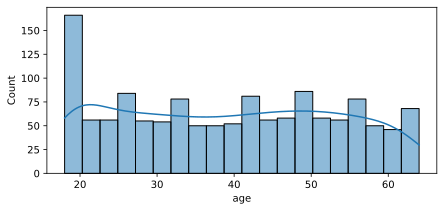

In [28]:
plt.figure(figsize=(7,3))
sns.histplot(data = df,x = 'age',bins = 20,kde=True)
plt.show()

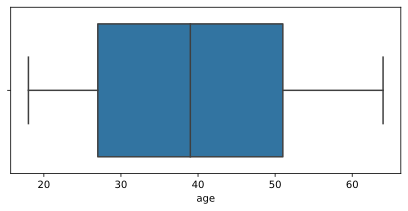

In [30]:
plt.figure(figsize=(7,3))
sns.boxplot(data = df, x='age')
plt.show()

In [32]:
# sex column analysis
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

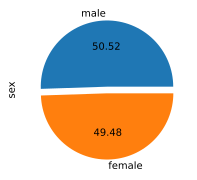

In [35]:
plt.figure(figsize=(3,3))
df['sex'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%0.2f')
plt.show()

In [36]:
# smoker column analysis
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

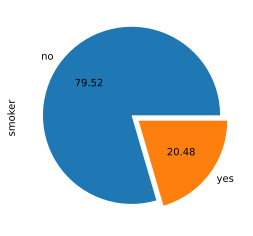

In [41]:
plt.figure(figsize=(4,4))
df['smoker'].value_counts().plot.pie(explode=(0.05,0.05),autopct = "%0.02f")
plt.show()

In [42]:
# region column analysis
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

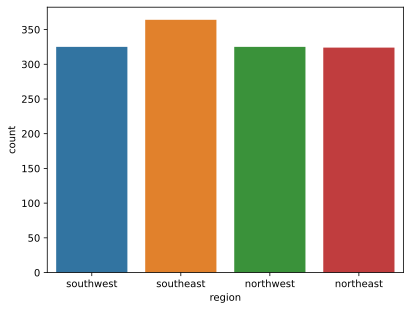

In [43]:
sns.countplot(data = df,x='region')
plt.show()

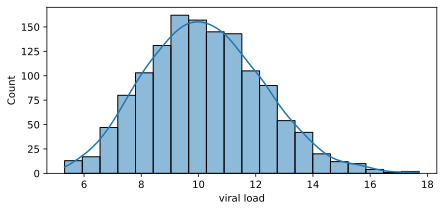

In [44]:
# viral load column analysis
plt.figure(figsize=(7,3))
sns.histplot(data = df,x = 'viral load',bins = 20,kde=True)
plt.show()

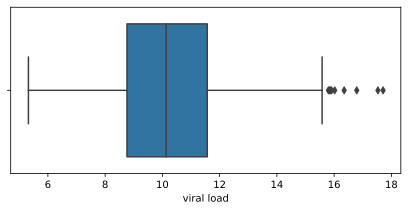

In [46]:
plt.figure(figsize=(7,3))
sns.boxplot(data = df,x = 'viral load')
plt.show()

In [189]:
# severity level analysis
df['severity level'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [50]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

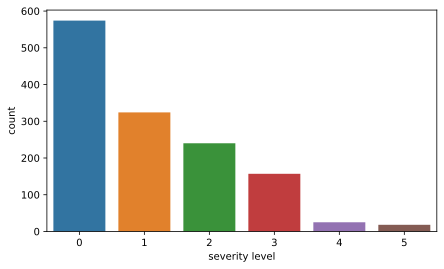

In [53]:
plt.figure(figsize=(7,4))
sns.countplot(data = df,x='severity level')
plt.show()

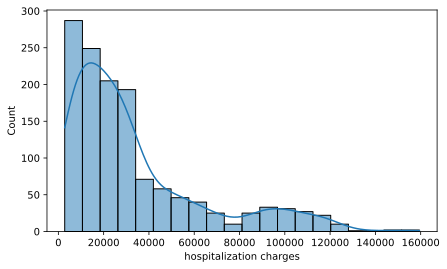

In [58]:
# hospitalization charges analysis
plt.figure(figsize=(7,4))
sns.histplot(data = df,x= 'hospitalization charges',kde=True,bins=20)
plt.show()

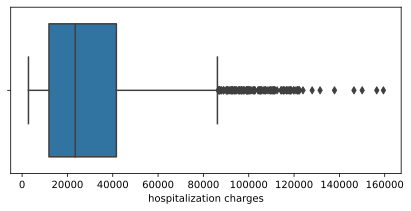

In [60]:
plt.figure(figsize=(7,3))
sns.boxplot(data = df,x = 'hospitalization charges')
plt.show()

# Univariate Analysis Inferences :
* 'Age' column has 47 unique values and does not have any outliers. Median & mean age are almost same = 39 years. Maximum age = 64 years & minmum age = 18 years
* Sex ratio is almost 1 in the dataset
* 20% population belongs to smoker group
* There are a total of 4 unique regions in the dataset and their proportion is same.
* 'viral load' column follows a normal distribution and it varies between 5.32 - 17.71
* There are a total number of six unique severity levels - 0,1,2,3,4,5. Maximum number of patients = 574 belong to severity level 0 and minimum number of patients = 18 belong to severity level 5
* Average hospitalization charges = 33K and maximum hospitalization charges = 1.6 lacs. There are a lot of outliers in the hospitalization charges column and almost follows a right skewed distribution

# Bivariate Analysis

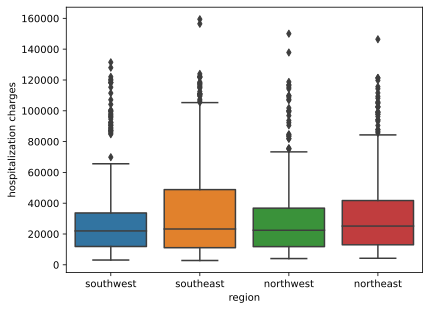

In [203]:
# region-wise hospitalization charges analysis
sns.boxplot(data=df, x='region', y='hospitalization charges')
plt.show()

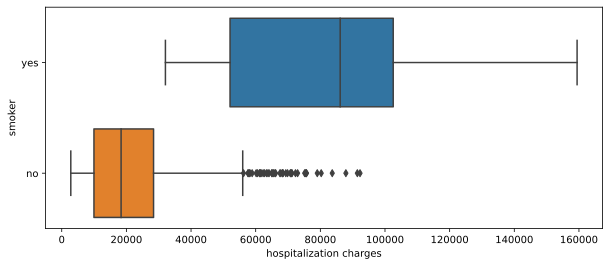

In [204]:
# hospitalization charges V/S smoker
plt.figure(figsize=(10,4))
sns.boxplot(data=df,y='smoker',x='hospitalization charges')
plt.show()

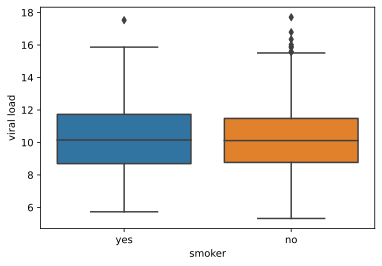

In [209]:
# viral load V/S smoker
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='smoker',y='viral load')
plt.show()

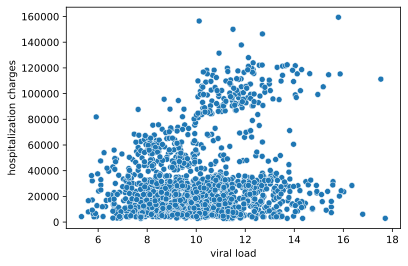

In [207]:
# viral load v/s hospitalization charges
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='viral load',y='hospitalization charges')
plt.show()

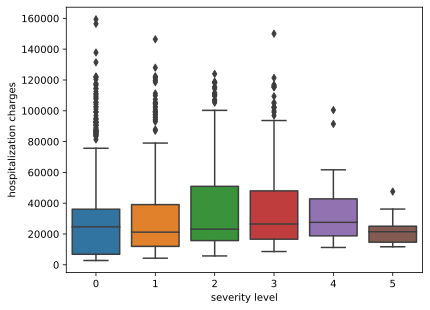

In [208]:
# severity level v/s hospitalization charges
sns.boxplot(data=df, x='severity level', y='hospitalization charges')
plt.show()

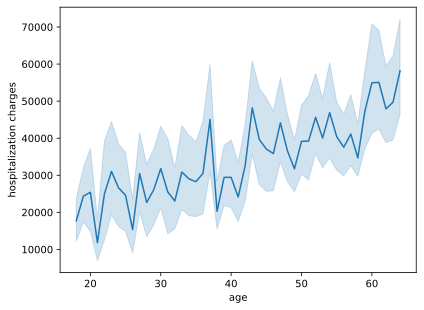

In [213]:
# age v/s hospitalization charges
sns.lineplot(data=df,x='age',y='hospitalization charges')
plt.show()

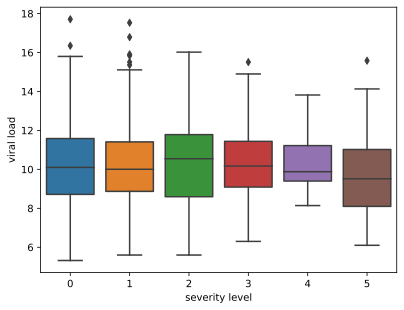

In [231]:
# seveity level v/s viral load
sns.boxplot(data=df, x='severity level', y='viral load')
plt.show()

# Bivariate Analysis Inferences :
1. Hospitalization charges across the four regions almost the same
2. Hospitalization charges of a smoker is significantly higher than a non-smoker
3. Viral load is same for both smoking and non-smoking people
4. Hospitalization charges for viral load <=10 is lesser than 80K
5. Hospitalization charges do not vary much with different severity levels
6. Hospitalization charges are generally higher for a higher age group
7. Viral load is almost the same across all severity levels

# Missing values treatment & Outlier treatment

In [237]:
# Treating outiers of hospitalization charges column
q1=df['hospitalization charges'].quantile(0.25)
q3=df['hospitalization charges'].quantile(0.75)
iqr=q3-q1
df=df[(df['hospitalization charges']>(q1-1.5*iqr) ) & (df['hospitalization charges']<(q3+1.5*iqr))]

In [238]:
# Treating outiers of viral load column
q1_v=df['viral load'].quantile(0.25)
q3_v=df['viral load'].quantile(0.75)
iqr_v=q3_v-q1_v
df=df[(df['viral load']>(q1_v-1.5*iqr_v) ) & (df['viral load']<(q3_v+1.5*iqr_v))]

In [239]:
df.shape # after removal of outliers

(1131, 7)

In [394]:
help(ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which

In [84]:
# There are no missing values present in the dataset which has been validated in the beginning

# Hypothesis Testing

1. Proving (or disproving) that the hospitalization charges of people who do smoking are greater than those who don't

Hypothesis Formulation :
* $H_0:$ Hospitalization charges is independent of smoker and non-smoker category
* $H_a:$ Hospitalization charges of smokers are greater than non-smokers

Let $\mu_1$ and $\mu_2$ be the hospitalization charges of the people belonging to smoking & non-smoking category respectively.
* $H_0: \mu_1 = \mu_2$
* $H_a: \mu_1 > \mu_2$

In [242]:
# Select Appropriate test
# This is a one-tailed test concerning two population means from two independent populations. As the population 
# standard deviations are unknown, the two sample independent t-test will be the appropriate test

In [259]:
# Segregating data to perform hypothesis test
smoker = df[df['smoker']=='yes']['hospitalization charges']
non_smoker = df[df['smoker']=='no']['hospitalization charges']

In [88]:
# Checking the assumptions of t-test

In [260]:
# Assumption 1: Normality
# Null Hypothesis(H0) : Sample is from normal distribution
# Alternate Hypothesis(Ha) : Sample is not from normal distribution
# finding the p-value with a significance level of 0.05
test_stat, p_value = shapiro(df['hospitalization charges'])
print(f"The p-value is {p_value}")

The p-value is 5.248625763914843e-23


* Since, p<<0.05, we reject $H_0:$ => sample is not from normal distribution

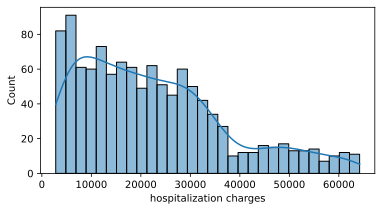

In [252]:
# checking for normal distribution visually
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='hospitalization charges',bins=30,kde = True)
plt.show()

* Distribution is not normal

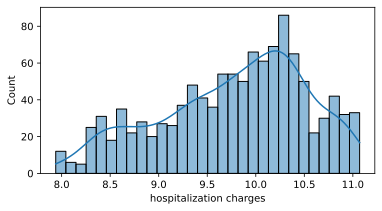

In [253]:
plt.figure(figsize=(6,3))
sns.histplot(np.log(df['hospitalization charges']),kde=True,bins=30)
plt.show()

In [255]:
# Assumption 2: Homogeneity of variances
# Null Hypothesis(H0) : Variances are equal
# Alternate Hypothesis(Ha) : At least one variance is different from the rest
# finding the p-value with a significance level of 0.05
test_stat, p_value = levene(smoker,non_smoker)
print(f"The p-value is {p_value}")

The p-value is 0.6775779783092117


* Since p_value > 0.05, we fail to reject $H_0:$ => Sample variances are homogeneous

In [262]:
print(f"Variance of smoker: {np.var(smoker)}")
print(f"Variance of non_smoker: {np.var(non_smoker)}")

Variance of smoker: 59231491.04906997
Variance of non_smoker: 152011620.7176491


In [263]:
print(f"Ratio of variances: {np.var(non_smoker)/np.var(smoker)}")

Ratio of variances: 2.566398684640844


* Since, ratio of variances is less than 4, variance can be treated as homogeneous

In [264]:
# Conducting Right tailed T-test with a significance level of 0.05
test_stat, p_value = ttest_ind(smoker,non_smoker,alternative='greater')
print('The p-value is', p_value)

The p-value is 1.46398965778502e-106


In [265]:
# Conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.46398965778502e-106 is less than the level of significance, we reject the null hypothesis.


# Conclusion : Hospitalization charges of smokers are greater than non-smokers

2. Proving (or disproving) with statistical evidence that the viral load of females is different from that of males

Hypothesis Formulation :
* $H_0:$  Viral load of males and females is same
* $H_a:$  Viral load of males and females is different

Let $\mu_1$ and $\mu_2$ be the viral load of males and females respectively.
* $H_0: \mu_1 = \mu_2$
* $H_a: \mu_1 != \mu_2$

In [391]:
# Select Appropriate test
# This is a two-tailed test concerning two population means from two independent populations. As the population 
# standard deviations are unknown, the two sample independent t-test will be the appropriate test

In [120]:
# Segregating data to perform hypothesis test
male_viral_load = df[df['sex']=='male']['viral load']
female_viral_load = df[df['sex']=='female']['viral load']

In [121]:
# Checking the assumptions of t-test

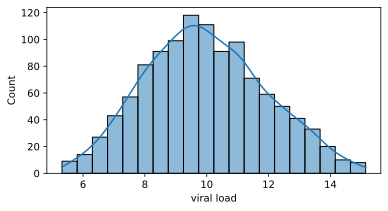

In [276]:
# Assumption 1: Normality
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='viral load',bins=20,kde = True)
plt.show()

* Distribution is normal

In [278]:
# Assumption 2: Homogeneity of variances
# Null Hypothesis(H0) : Variances are equal
# Alternate Hypothesis(Ha) : At least one variance is different from the rest
# finding the p-value with a significance level of 0.05
test_stat, p_value = levene(male_viral_load,female_viral_load,center='mean')
print(f"The p-value is {p_value}")

The p-value is 0.6685324700172357


* Since p_value > 0.05, we fail to reject the null hypothesis => Variances are homogeneous

In [279]:
print(f"Variance of smoker: {round(np.var(male_viral_load),2)}")
print(f"Variance of non_smoker: {round(np.var(female_viral_load),2)}")

Variance of smoker: 3.68
Variance of non_smoker: 3.78


In [128]:
# Hence,assumptions of t-test are satisfied

In [389]:
# Conducting two tailed T-test with a significance level of 0.05
test_stat, p_value = ttest_ind(male_viral_load,female_viral_load)
print('The p-value is', p_value)

The p-value is 0.6730370096940954


In [281]:
# Conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {np.round(p_value,3)} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {np.round(p_value,3)} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.673 is greater than the level of significance, we fail to reject the null hypothesis.


# Conclusion :  Viral load of males and females is same

3. Is the proportion of smoking significantly different across different regions?

Hypothesis Formulation :
* $H_0:$  Smoking proportion is same across all regions
* $H_a:$  Smoking proportion is different across different regions

In [ ]:
# Select Appropriate test
# Both 'smoker' and 'region' columns are categorical => Chi-square test needs to be performed

In [282]:
# Segregating data to perform hypothesis test
pd.crosstab(index = df['smoker'],columns = df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,250,257,255,260
yes,32,28,26,23


In [287]:
# Checking the Assumptions of chi-square test 
# 1. Both variables are categorical => True
# 2. All observations are independent => True
# 3. Cells in the contingency table are mutually exclusive (no individual has been counted in more than one cell) => True
# 4. All bins have frequency >= 5 => True

In [289]:
# All assumptions of Chi-square test are satisfied

In [291]:
# Conducting Chi-square test with a significance level of 0.05
test_stat, p_value, dof, expected_values = chi2_contingency(pd.crosstab(index = df['smoker'],columns = df['region']))
print('The p-value is', p_value)

The p-value is 0.6264567303887856


In [148]:
# Conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.6264567303887856 is greater than the level of significance, we fail to reject the null hypothesis.


# Conclusion : Smoking proportion is same across all regions

4. Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?

Hypothesis Formulation :
* $H_0:$  Mean viral load of women with 0 Severity level , 1 Severity level and 2 Severity level is same
* $H_a:$  Mean viral load of women with 0 Severity level , 1 Severity level and 2 Severity level is different

Let $\mu_1$, $\mu_2$, $\mu_3$  be the mean viral load of women with 0,1 and 2 severity level respectively respectively.
* $H_0: \mu_1 = \mu_2$ = $\mu_3$
* $H_a:$  At least one difference among the means

In [292]:
# Select Appropriate test
# Since means of more than 2 groups needs to be compared (categorical v/s numerical) => One way ANOVA test needs to be performed

In [368]:
# Segregating data to perform hypothesis test --> with same sample size which is the minimum among these 3(len(severity_2) = 101)
severity_0 = df[(df['sex']=='female') & (df['severity level']==0)]['viral load'].sample(101)
severity_1 = df[(df['sex']=='female') & (df['severity level']==1)]['viral load'].sample(101)
severity_2 = df[(df['sex']=='female') & (df['severity level']==2)]['viral load'].sample(101)

In [294]:
# Checking the assumptions of one way ANOVA

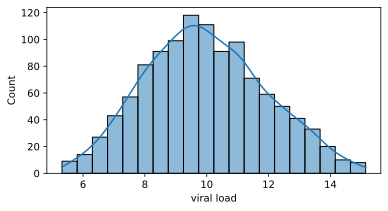

In [293]:
# Assumption 1: Normality
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='viral load',bins=20,kde = True)
plt.show()

* Distribution is normal

In [357]:
# Assumption 2: Homogeneity of variances
# Null Hypothesis(H0) : Variances are equal
# Alternate Hypothesis(Ha) : At least one variance is different from the rest
# finding the p-value with a significance level of 0.05
test_stat, p_value = levene(severity_0,severity_1,severity_2,center='mean')
print(f"The p-value is {p_value}")

The p-value is 0.584775145725906


* Since p_value > 0.05, we fail to reject the null hypothesis => Variances are homogeneous

In [302]:
# Assumption 3 : Data is independent => True

In [358]:
# Conducting one way ANOVA with a significance level of 0.05
test_stat, p_value = f_oneway(severity_0,severity_1,severity_2)
print('The p-value is', p_value)

The p-value is 0.603997858358273


In [359]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.603997858358273 is greater than the level of significance, we fail to reject the null hypothesis.


# Conclusion : There is no significant difference in the mean viral load of women with 0, 1 and 2 Severity level

5. Does severity level affect the hospitalization charges (For Business Recommendation)

Hypothesis Formulation :
* $H_0:$  Hospitalization charges for all severity levels is same
* $H_a:$  Hospitalization charges for different severity levels is different

In [369]:
# Select Appropriate test
# Since means of more than 2 groups needs to be compared (categorical v/s numerical) => One way ANOVA test needs to be performed

In [392]:
# Segregating data to perform hypothesis test 
severity_0_hosp = df[df['severity level']==0]['hospitalization charges']
severity_1_hosp = df[df['severity level']==1]['hospitalization charges']
severity_2_hosp = df[df['severity level']==2]['hospitalization charges']
severity_3_hosp = df[df['severity level']==3]['hospitalization charges']
severity_4_hosp = df[df['severity level']==4]['hospitalization charges']
severity_5_hosp = df[df['severity level']==5]['hospitalization charges']

In [374]:
# checking assumptions
# we have already observed that hospitalization charges does not come from a normal distribution => so assumptions fail
# Hence,Kruskal Wallis test needs to be performed

In [393]:
# Conducting one way Kruskal Wallis with a significance level of 0.05
test_stat, p_value = kruskal(severity_0_hosp,severity_1_hosp,severity_2_hosp,severity_3_hosp,severity_4_hosp,severity_5_hosp)
print(f"The p-value is {p_value}")

The p-value is 2.323999198777368e-06


In [385]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 2.323999198777368e-06 is less than the level of significance, we reject the null hypothesis.


* Conclusion: Hospitalization charges for different severity levels is different

# Business Insights

# Univariate Analysis Inferences :
* 'Age' column has 47 unique values and does not have any outliers. Median & mean age are almost same = 39 years. Maximum age = 64 years & minmum age = 18 years
* Sex ratio is almost 1 in the dataset
* 20% population belongs to smoker group
* There are a total of 4 unique regions in the dataset and their proportion is almost same
* 'viral load' column follows a normal distribution and it varies between 5.32 - 17.71
* There are a total number of six unique severity levels - 0,1,2,3,4,5. Maximum number of patients = 574 belong to severity level 0 and minimum number of patients = 18 belong to severity level 5
* Average hospitalization charges = 33K and maximum hospitalization charges = 1.6 lacs. There are a lot of outliers in the hospitalization charges column and almost follows a right skewed distribution

# Bivariate Analysis Inferences :
* Hospitalization charges across the four regions is almost the same
* Hospitalization charges of a smoker is significantly higher than a non-smoker
* Viral load is same for both smoking and non-smoking people
* Hospitalization charges for viral load<=10 is lesser than 80K
* Hospitalization charges do not vary much with different severity levels
* Hospitalization charges are generally higher for a higher age group
* Viral load is almost the same across all severity levels

# Recommendations :
* Hospitalization charges of smoking population is significantly higher than non-smoking population. Apollo Hospitals can use this fact to target marketing efforts to smokers, promoting their services as a way to quit smoking and improve their health. Also, they can consider pricing strategies that reflect the higher cost of treating smoking-related illnesses. This could involve adjusting insurance premiums or charging higher fees for smoking-related treatments.
* Viral load is independent of gender of person
* Proportion of smoking people is same across all four regions
* There is no significant difference in the mean viral load of women with 0, 1 and 2 severity level
* Hospitalization charges for different severity levels is different. Apollo Hospitals can use this information to develop treatment plans that are appropriate for patients with different severity levels. They can use this information to allocate staff, equipment and other resources more effectively.
* Hospitalization charges for viral load <=10 is lesser than 80K
* Hospitalization charges are generally higher for a higher age group. By tracking the costs and outcomes of hospitalizations for different age groups, Apollo hospitals can identify opportunities to improve care quality and efficiency for older patients.